In [1]:
# import the pysb module:
from pysb import *

In [2]:
#initiate a model
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7ff738020b20>

In [3]:
#declare monomers
Monomer('Trail', ['b'])
Monomer('ReceptorpR', ['b']) 
Monomer('DISC', ['b'])
Monomer('Flip', ['b'])
Monomer('C8', ['b','s'], {'s': ['None','p']})   #p=procaspase
Monomer('BAR', ['b'])
Monomer('C3', ['b','s'], {'s': ['None', 'p','u']}) #p=procaspase, u=ubiquitinated 
Monomer('C6', ['b','s'], {'s': ['None','p']})   #p=procaspase
Monomer('XIAP', ['b'])
Monomer('PARP', ['b','s'], {'s': ['None', 'c']})  #c=cleaved
Monomer('Bid', ['b','s'], {'s': ['None', 't']})   #t=truncated
Monomer('Bcl2', ['b','s'], {'s': ['None', 'c']})
Monomer('Bax', ['b','s'], {'s': ['None','a', 'm']}) #m=mitochondrial
Monomer('Bax2', ['b'])
Monomer('Bax4', ['b'])
Monomer('Mito', ['b','s'], {'s': ['None','A']}) 
Monomer('CytoC', ['b','s'], {'s': ['None','A', 'm', 'c']})    #m=mitochondrial, c=cytosolic
Monomer('Smac', ['b','s'], {'s': ['None','A', 'm','c']})    #m=mitochondrial, c=cytosolic
Monomer('Apaf', ['b','s'], {'s': ['None','a']})   #a=assembled/active
Monomer('C9', ['b','s'], {'s': ['None','p']})   #p=procaspase
Monomer('Apop', ['b'])


Monomer('Apop', ['b'])

In [4]:
#input the parameter values
Parameter('k_b1', 1e-3)
Parameter('k_b2', 1e-2)

Parameter('k_f1', 4e-7)
Parameter('k_f2', 1e-6)
Parameter('k_f3', 1e-7)
Parameter('k_f4', 3e-8)
Parameter('k_f5', 2e-6)
Parameter('k_f6', 1e-2)
Parameter('k_f7', 1.4286e-5)
Parameter('k_f8', 2.857e-5)
Parameter('k_f9', 5e-7)
Parameter('k_f10', 5e-8)
Parameter('k_f11', 5e-9)
Parameter('k_f12', 7e-6)

Parameter('k_c1', 1e-5)
Parameter('k_c2', 1e0)
Parameter('k_c3', 1e-1)
Parameter('k_c4', 1e1)

Parameter('k_c4', 10.0)

In [5]:
#input the rules
Rule('Trail_binds_pR', Trail(b=None) + ReceptorpR(b=None) | Trail(b=1)%ReceptorpR(b=1), k_f1, k_b1) 
Rule('TrailpR_makes_DISC', Trail(b=1)%ReceptorpR(b=1) >> DISC(b=None), k_c1)
Rule('Flip_inhibits_DISC', Flip(b=None) + DISC(b=None) | Flip(b=1)%DISC(b=1), k_f2, k_b1)

Rule('pC8_binds_DISC', C8(b=None, s='p') + DISC(b=None) | C8(b=1, s='p')%DISC(b=1), k_f2, k_b1)
Rule('procaspase8_to_caspase8', C8(b=1, s='p')%DISC(b=1) >> C8(b=None, s='None') + DISC(b=None), k_c2)

Rule('C8_inhibits_BAR', C8(b=None, s='None') + BAR(b=None) | C8(b=1, s="None")%BAR(b=1), k_f2, k_b1)

Rule('C8_inhibits_BAR', C8(b=None, s='None') + BAR(b=None) | C8(b=1, s='None') % BAR(b=1), k_f2, k_b1)

In [6]:
Rule('pC3_binds_C8', C3(b=None, s='p') + C8(b=None, s='None') | C3(b=1, s='p')%C8(b=1, s='None'), k_f3, k_b1)
Rule('proC3_to_C3', C3(b=1, s='p')%C8(b=1, s='None') >> C3(b=None, s='None') + C8(b=None, s='None'), k_c2)

Rule('pC6_binds_C3', C6(b=None, s='p') + C3(b=None, s='None') | C6(b=1, s='p')%C3(b=1, s='None'), k_f2, k_b1)
Rule('proC6_to_C6', C6(b=1, s='p')%C3(b=1, s='None') >> C6(b=None, s='None') + C3(b=None, s='None'), k_c2)

Rule('pC8_binds_C6', C8(b=None, s='p') + C6(b=None, s='None') | C8(b=1, s='p')%C8(b=1, s='None'), k_f4, k_b1)
Rule('proC8_to_C8', C8(b=1, s='p')%C6(b=1, s='None') >> C8(b=None, s='None') + C6(b=None, s='None'), k_c2)

Rule('XIAP_binds_C3', XIAP(b=None) + C3(b=None, s='None') | XIAP(b=1)%C3(b=1, s='None'), k_f5, k_b1)
Rule('C3_ubiq', XIAP(b=1)%C3(b=1, s='None') >> XIAP(b=None) + C3(b=None, s='u'), k_c3)

Rule('C3_binds_PARP', PARP(b=None, s='None') + C3(b=None, s='None') | PARP(b=1, s='None')%C3(b=1, s='None'), k_f2, k_b2)
Rule('PARP_cleavage', PARP(b=1, s='None')%C3(b=1, s='None') >> PARP(b=None, s='c') + C3(b=None, s='None'), k_c2)


Rule('PARP_cleavage', PARP(b=1, s='None') % C3(b=1, s='None') >> PARP(b=None, s='c') + C3(b=None, s='None'), k_c2)

In [7]:
Rule('C8_binds_Bid', Bid(b=None, s='None') + C8(b=None, s='None') | Bid(b=1, s='None')%C8(b=1, s='None'), k_f3, k_b1)
Rule('tBid_activation', Bid(b=1, s='None')%C8(b=1, s='None') >> Bid(b=None, s='t') + C8(b=None, s='None'), k_c2)

Rule('Bcl2c_inhibits_tBid', Bcl2(b=None, s='c') + Bid(b=None, s='t') | Bcl2(b=1, s='c')%Bid(b=1, s='t'), k_f2, k_b1)

Rule('Bax_binds_tBid', Bax(b=None, s='None') + Bid(b=None, s='t') | Bax(b=1, s='None')%Bid(b=1, s='t'), k_f3, k_b1)
Rule('Bax_to_aBax', Bax(b=1, s='None')%Bid(b=1, s='t') >> Bax(b=None, s='a') + Bid(b=None, s='t'), k_c2)

Rule('aBax_to_mBax', Bax(b=None, s='a') | Bax(b = None, s='m'), k_f6, k_b2)
Rule('Bcl2_inhibits_mBax', Bcl2(b=None, s='None') + Bax(b=None, s='m') | Bcl2(b=1, s='None')%Bax(b=1, s='m'), k_f7, k_b1)

Rule('mBax_to_Bax2', Bax(b=None, s='m') + Bax(b=None, s='m') | Bax2(b = None), k_f8, k_b1)
Rule('Bcl2_inhibits_Bax2', Bcl2(b=None, s='None') + Bax2(b=None) | Bcl2(b=1, s='None')%Bax2(b=1), k_f7, k_b1)

Rule('Bax2_to_Bax4', Bax2(b=None) + Bax2(b=None) | Bax4(b = None), k_f8, k_b1)
Rule('Bcl2_inhibits_Bax4', Bcl2(b=None, s='None') + Bax4(b=None) | Bcl2(b=1, s='None')%Bax4(b=1), k_f7, k_b1)


Rule('Bcl2_inhibits_Bax4', Bcl2(b=None, s='None') + Bax4(b=None) | Bcl2(b=1, s='None') % Bax4(b=1), k_f7, k_b1)

In [8]:
Rule('Bax4_binds_Mito', Bax4(b=None) + Mito(b=None, s='None') | Bax4(b=1)%Mito(b=1, s='None'), k_f7, k_b1) 
Rule('Mito_to_AMito', Bax4(b=1)%Mito(b=1, s='None') >> Mito(b=None, s='A'), k_c2)

Rule('AMito_binds_mCytoC', Mito(b=None, s='A') + CytoC(b=None, s='m') | Mito(b=1, s='A')%CytoC(b=1, s='m'), k_f8, k_b1) 
Rule('mCytoC_becomes_ACytoC', Mito(b=1, s='A')%CytoC(b=1, s='m') >> Mito(b=None, s='A') +CytoC(b=None, s='A'), k_c4)

Rule('AMito_binds_mSmac', Mito(b=None, s='A') + Smac(b=None, s='m') | Mito(b=1, s='A')%Smac(b=1, s='m'), k_f8, k_b1) 
Rule('mSmac_becomes_ASmac', Mito(b=1, s='A')%Smac(b=1, s='m') >> Mito(b=None, s='A') +Smac(b=None, s='A'), k_c4)

Rule('ACytoC_to_cCytoC', CytoC(b=None, s='A') | CytoC(b = None, s='c'), k_f6, k_b2)

Rule('Apaf_binds_cCytoC', Apaf(b=None, s='None') + CytoC(b=None, s='c') | Apaf (b=1, s='None')%CytoC(b=1, s='c'), k_f9, k_b1) 
Rule('Apaf_becomes_aApaf', Apaf(b=1, s='None')%CytoC(b=1, s='c') >> Apaf(b=None, s='a') + CytoC(b=None, s='c'), k_c2)

Rule('Apaf_binds_pC9', Apaf(b=None, s='a') + C9(b=None, s='p') | Apop(b=None), k_f10, k_b1) 

Rule('Apop_binds_pC3', Apop(b=None) + C3(b=None, s='p') | Apop(b=1)%C3(b=1, s='p'), k_f11, k_b1) 
Rule('pC3_becomes_C3', Apop(b=1)%C3(b=1, s='p') >> Apop(b=None) + C3(b=None, s='None'), k_c2)

Rule('ASmac_to_cSmac', Smac(b=None, s='A') | Smac(b = None, s='c'), k_f6, k_b2)

Rule('XIAP_inhibits_Apop', XIAP(b=None) + Apop(b=None) | XIAP(b=1)%Apop(b=1), k_f5, k_b1)
Rule('XIAP_inhibits_cSmac', XIAP(b=None) + Smac(b=None, s='c') | XIAP(b=1)%Smac(b=1, s='c'), k_f12, k_b1)

Rule('XIAP_inhibits_cSmac', XIAP(b=None) + Smac(b=None, s='c') | XIAP(b=1) % Smac(b=1, s='c'), k_f12, k_b1)

In [9]:
#initial conditions

Initial(Trail(b=None), Parameter('initTrail', 3e3))
Initial(ReceptorpR(b=None), Parameter('initReceptorpR', 2e2))
Initial(Flip(b=None), Parameter('initFlip', 1e2))
Initial(C8(b=None, s='p'), Parameter('initpC8', 2e4))
Initial(BAR(b=None), Parameter('initBAR', 1e3))
Initial(C3(b=None, s='p'), Parameter('initpC3', 1e4))
Initial(C6(b=None, s='p'), Parameter('initpC6', 1e4))
Initial(XIAP(b=None), Parameter('initXIAP', 1e5))
Initial(PARP(b=None, s='None'), Parameter('initPARP', 1e6))
Initial(Bid(b=None, s='None'), Parameter('initBid', 4e4))
Initial(Bcl2(b=None, s='None'), Parameter('initBcl2', 2e4))
Initial(Bcl2(b=None, s='c'), Parameter('initBcl2c', 2e4))
Initial(Bax(b=None, s='None'), Parameter('initBax', 1e5))
Initial(Mito(b=None, s='None'), Parameter('initMito', 5e5))
Initial(CytoC(b=None, s='m'), Parameter('initmCytoC', 5e5))
Initial(Smac(b=None, s='m'), Parameter('initmSmac', 1e5))
Initial(Apaf(b=None, s='None'), Parameter('initApaf', 1e5))
Initial(C9(b=None, s='p'), Parameter('initpC9', 1e5))


Initial(C9(b=None, s='p'), initpC9)

In [10]:
Observable('tBid', Bid(b=None, s='t'))
Observable('bax', Bax(b=None, s='a'))
Observable('bcl2', Bcl2(b=None, s='None'))
Observable('cbcl2', Bcl2(b=None, s='c'))

Observable('cytochromec', CytoC(b=None, s='c'))
Observable('csmac', Smac(b=None, s='c'))
Observable('apop', Apop(b=None))
Observable('xiap', XIAP(b=None))

Observable('PARPlevels', PARP(b=None, s='None'))
Observable('cPARPlevels', PARP(b=None, s='c'))

Observable('cPARPlevels', PARP(b=None, s='c'))

In [11]:
# Import Scipy Ode Simulator from PySB library
from pysb.simulator import ScipyOdeSimulator
from pylab import *

In [12]:
# Create simulation time
time = linspace(0, 72000, 1200)

In [13]:
sim = ScipyOdeSimulator(model, time).run()
simResults = sim.all

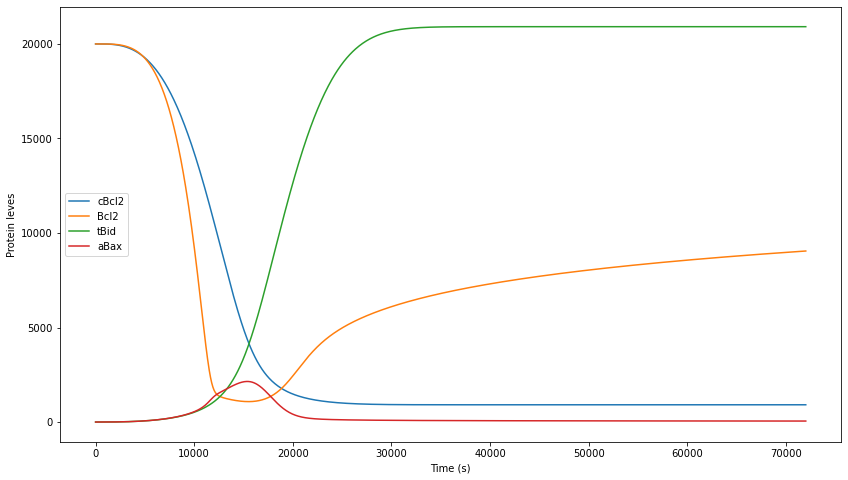

In [14]:
plt.figure(figsize=(14, 8))
plt.plot(time, simResults['cbcl2'], label='cBcl2')
plt.plot(time, simResults['bcl2'], label='Bcl2')
plt.plot(time, simResults['tBid'], label='tBid')
plt.plot(time, simResults['bax'], label='aBax')
plt.legend(loc=0)
plt.xlabel("Time (s)")
plt.ylabel("Protein leves")
plt.show()

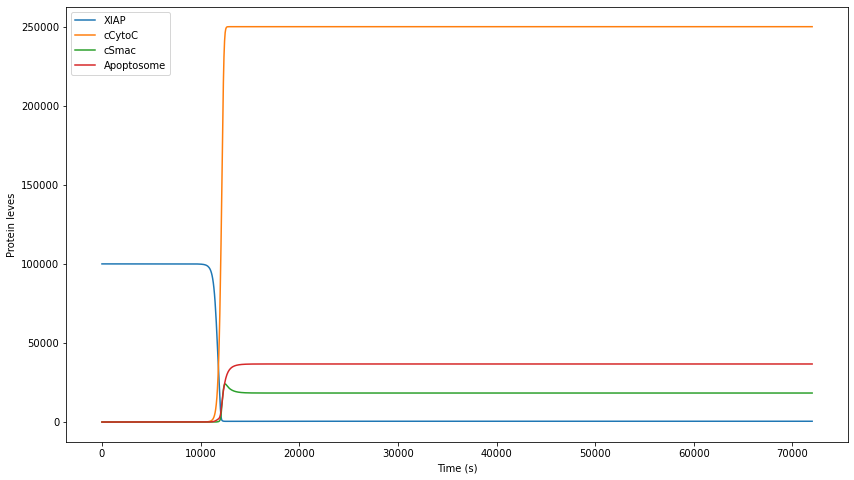

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(time, simResults['xiap'], label='XIAP')
plt.plot(time, simResults['cytochromec'], label='cCytoC')
plt.plot(time, simResults['csmac'], label='cSmac')
plt.plot(time, simResults['apop'], label='Apoptosome')
plt.legend(loc=0)
plt.xlabel("Time (s)")
plt.ylabel("Protein leves")
plt.show()

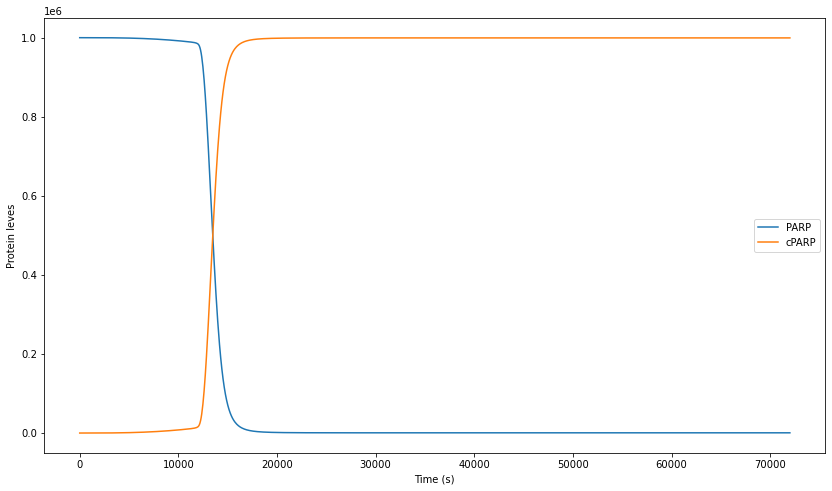

In [16]:
plt.figure(figsize=(14, 8))
plt.plot(time, simResults['PARPlevels'], label='PARP')
plt.plot(time, simResults['cPARPlevels'], label='cPARP')
plt.legend(loc=0)
plt.xlabel("Time (s)")
plt.ylabel("Protein leves")
plt.show()